<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

### Load all the libraries

In [1]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [2]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [4]:
from explore_data_Copy2 import *
import seaborn as sns
sns.set()

In [5]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

### Explore data set

In [6]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [7]:
yelp['text'] = yelp['text'].apply(lambda x: x.lower())

In [8]:
yelp['text'][2]

"i've been to vegas dozens of times and had never stepped foot into circus circus.  for one reason mostly, the resort is marketed to familes that travel to vegas, so what business does a twenty-three year old have at circus circus? well, i needed a room for one night and i got on hotels.com and the rate was only $24 so i pulled the trigger.  upon arriving, the interior was nicer than i expected and check-in went by fast even with a long line.\n\nthe young lady checked me in and explained how to get to my room, which looked like quite a journey. i eventually made it to my room and bypassed the kids area, restaurants, and bars. i entered my key card and was surprised at how nice a room $25 could buy. sure, this isn't the wynn or bellagio, but nevertheless, i was impressed. i only stayed for the night and was unable to thorougly explore the property. my only complaint is the casino is difficult to navigate and needs more maps and signs. regardless, if your on a budget and need a quick roo

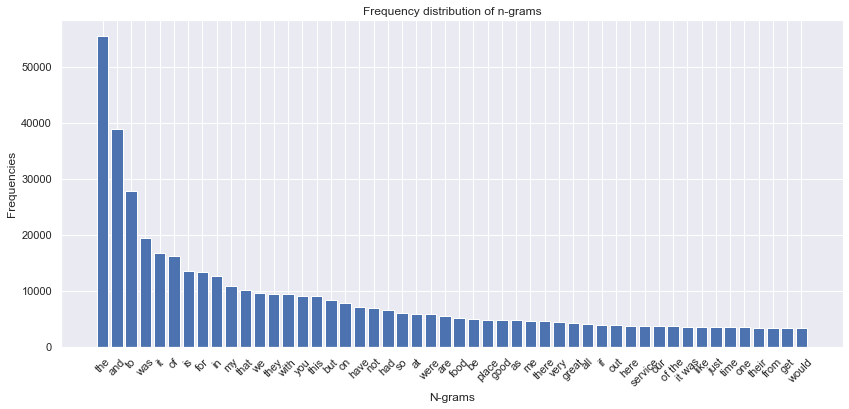

In [9]:
# the way we can spot the future stop words
plot_frequency_distribution_of_ngrams(yelp['text'],
                                      ngram_range=(1, 2),
                                      num_ngrams=50)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [10]:
def tokenize(doc):
        tokens = re.sub(r'[^a-zA-Z ^0-9]', '', doc)
        tokens = tokens.lower().split()
        
        return tokens

In [11]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [13]:
yelp['tokens'].head()

0    [beware, fake, fake, fakewe, also, own, a, sma...
1    [came, here, for, lunch, togo, service, was, q...
2    [ive, been, to, vegas, dozens, of, times, and,...
3    [we, went, here, on, a, night, where, they, cl...
4    [35, to, 4, starsnot, bad, for, the, price, 12...
Name: tokens, dtype: object

In [ ]:
nlp.Defaults.stop_words

In [120]:
STOP_WORDS = nlp.Defaults.stop_words.union(['the', 'and', 'to', 'was', 'it', 'I', 'of', 'i', 'is', 'for', "it's", 'it.', 'in', 'my', 'that', 'we', "'ts", 'they', "'s", "it'", "i've", 'with', 'you', 'this', 'but', 'on', 'have', 'had', 'so', 'at'])

In [121]:
# Another way of creating tokens
tokens = []

tokenizer = Tokenizer(nlp.vocab)

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(yelp['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

yelp['tokens'] = tokens

In [14]:
yelp['bad_review'] = yelp['stars'] <= 3
yelp['good_review'] = yelp['stars'] >= 4

In [15]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,bad_review,good_review
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"beware!!! fake, fake, fake....we also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fakewe, also, own, a, sma...",True,False
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,came here for lunch togo. service was quick. s...,0,5CgjjDAic2-FAvCtiHpytA,"[came, here, for, lunch, togo, service, was, q...",False,True
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,i've been to vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[ive, been, to, vegas, dozens, of, times, and,...",True,False
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,we went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[we, went, here, on, a, night, where, they, cl...",True,False
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nnot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[35, to, 4, starsnot, bad, for, the, price, 12...",False,True


In [16]:
yelp.dtypes

business_id            object
cool                    int64
date           datetime64[ns]
funny                   int64
review_id              object
stars                   int64
text                   object
useful                  int64
user_id                object
tokens                 object
bad_review               bool
good_review              bool
dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [17]:
yelp.shape

(10000, 12)

In [18]:
data = yelp['text']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tokenize = Tokenizer(nlp.vocab)


# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = ['english','i'],
#                         tokenizer = tokenize,
                        ngram_range = (1,2),
                        min_df = 5, 
                        max_df = 0.7,
                        max_features = 5000
                       )

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(10000, 5000)


,00,10,10 minutes,100,11,12,13,14,15,15 minutes,...,your food,your money,your mouth,your order,your own,your time,yourself,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.12233,0.0,0.0,0.109597,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [21]:
fake_review = [ """
That was a terrible experience. Could not get anyone on the phone from the customer care. They do not care about there product.
That should've been a great present for my friend. Please do not buy. It is a scam.
"""]

In [22]:
fake = tfidf.transform(fake_review)

In [23]:
nn.kneighbors(fake.todense())

(array([[1.        , 1.        , 1.18671209, 1.21868395, 1.22764178,
         1.23575693, 1.24105799, 1.24584432, 1.25444082, 1.25753378]]),
 array([[6311, 6204, 8411, 8483, 5926, 1916, 3276, 5298, 5171, 6026]]))

####  - In my fake review I wasn't happy with the customer service phone line, NearestNeighbors shoves me the review of a similar response.

In [24]:
data[8411]

"the man that answers the phone has a horrible attitude. if they do not want to do delivary shouldn't be advertising as so."

In [25]:
data[5298]

'terrible.. absolutely terrible. dr. hinds is especially rude, very difficult to get anyone to return a phone call, just overall terrible patient care.'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

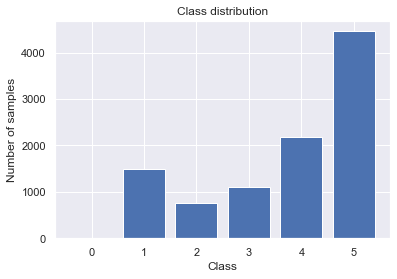

In [26]:
plot_class_distribution(yelp['stars'])

In [27]:
# Let's predict good or bad reviews
yelp['good_review'] = (yelp['good_review'] == True ).astype(int)

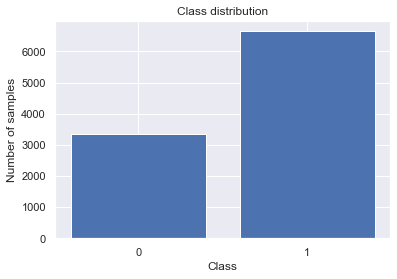

In [28]:
plot_class_distribution(yelp['good_review'])

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(yelp, train_size=0.80, test_size=0.20, random_state=42)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)
train.shape, val.shape, test.shape

((6400, 12), (1600, 12), (2000, 12))

In [30]:
train.sample(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,bad_review,good_review
3873,Hq86WlkF7bdQlaGe_p5fHA,0,2014-12-21 02:09:39,1,jIbak_mqniC0jkKMkrsaRA,2,gave it another go.....worse than before. need...,3,ExJ0BkNDdjs2hdn-7z2kHA,"[gave, it, another, goworse, than, before, nee...",True,0
9023,rdE9gg0WB7Z8kRytIMSapg,0,2018-09-04 03:27:54,0,bPFoMMxtLAcnANKQFD1aCg,5,one of my favorite places in town to eat out. ...,0,VP1uqaR_ZQuOsz7ukh473w,"[one, of, my, favorite, places, in, town, to, ...",False,1


### Define Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
%%time
vect = TfidfVectorizer(stop_words=['english', 'and', 'the', 'of', 'with', 'in', 'is', 'this',
                                   'to'],
                                   ngram_range=(1,2),
                                   min_df = 5,
                                   max_df = 0.6)

clf = RandomForestClassifier(n_estimators=400, max_features='auto', max_depth=70,
                           min_samples_leaf=2, min_samples_split=5,
                           random_state=42, n_jobs=-1)

pipe = Pipeline([('vect', vect), ('clf', clf)])

CPU times: user 149 µs, sys: 0 ns, total: 149 µs
Wall time: 153 µs


In [33]:
%%time
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (300, 500),
    'clf__n_estimators': (25, 100),
    'clf__max_depth': (15, 20)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['text'], train['good_review'])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:  5.0min finished


CPU times: user 10.8 s, sys: 1.15 s, total: 11.9 s
Wall time: 5min 6s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.6,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        no

#### Val score

In [34]:
%%time
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(val['text'])
print('Validation Accuracy', accuracy_score(val['good_review'], y_pred))

Validation Accuracy 0.798125
CPU times: user 328 ms, sys: 18 ms, total: 346 ms
Wall time: 388 ms


#### Test score

In [54]:
test_pred = grid_search.predict(test['text'])
print('Test Accuracy', accuracy_score(test['good_review'], test_pred))

Test Accuracy 0.796


In [52]:
pred = grid_search.predict(fake_review)

In [39]:
submission = pd.DataFrame({'good_review_?':pred})
submission['good_review_?'] = submission['good_review_?'].astype('int64')

#### As you can see my model predicted my fake_review as a bad review, wich is correct.

In [40]:
submission.head()

,good_review_?
0,0


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [55]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [122]:
id2word = corpora.Dictionary(yelp['tokens'])

In [123]:
yelp['tokens']

0       [beware!!!, fake,, fake,, fake....we, small, b...
1       [came, lunch, togo., service, quick., staff, f...
2       [i've, vegas, dozens, times, stepped, foot, ci...
3       [went, night, closed, street, party..., best, ...
4       [3.5, 4, stars, \n\n, bad, price,, $12.99, lun...
                              ...                        
9995    [family, hungry, subway, open, 24, hours, guy,...
9996    [wife, came, couple, friends., sever, excited,...
9997    [food, ok, brag, about., food, hot,, items, ta...
9998    [today's, visit, great!!, love, enjoy, town, s...
9999    [absolute, worst, place, stayed, 43, year, lif...
Name: tokens, Length: 10000, dtype: object

In [124]:
# Remove extreme values
id2word.filter_extremes(no_below=5, no_above=0.95)

Create a bag of words representation of the entire corpus

In [125]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the doc_stream f(x)
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [126]:
%%time
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

CPU times: user 2.03 s, sys: 141 ms, total: 2.17 s
Wall time: 3.43 s


In [127]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [138]:
topics = [' '.join(t[0:20]) for t in words]

In [143]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
  

 place great food like good time service 


------ Topic 1 ------
  

 place great good food 
 it's time like

------ Topic 2 ------
  

 place food like it's service great good time

------ Topic 3 ------
  

 good great food place like service got time

------ Topic 4 ------
  

 
 great food good place it's like service

------ Topic 5 ------
  

 like 
 good great food place it's time

------ Topic 6 ------
  

 food good place it's like great 
 service

------ Topic 7 ------
  

 food place great service 
 like got it's

------ Topic 8 ------
  

 like 
 food place great it's time good

------ Topic 9 ------
  

 
 like place great time food service it's



Create 1-2 visualizations of the results

In [134]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [135]:
%%time
pyLDAvis.gensim.prepare(lda, corpus, id2word)
# you can change 'gensim' for 'sklearn'

CPU times: user 11.1 s, sys: 181 ms, total: 11.3 s
Wall time: 16.2 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.000667 -0.000541       1        1  10.310287
3      0.003723 -0.002161       2        1  10.233697
7      0.002518 -0.001504       3        1  10.177424
0     -0.001297 -0.003315       4        1  10.125813
2     -0.001659 -0.002080       5        1  10.027620
8      0.002314  0.003885       6        1  10.002481
1     -0.004714 -0.001036       7        1   9.956414
9     -0.003478  0.004292       8        1   9.863910
6      0.000880  0.000717       9        1   9.842240
5      0.002381  0.001743      10        1   9.460116, topic_info=       Term          Freq         Total Category  logprob  loglift
0            14200.000000  14200.000000  Default  30.0000  30.0000
49     \n\n   8405.000000   8405.000000  Default  29.0000  29.0000
329      \n   3151.000000   3151.000000  Default  28.0000  28.0000
179    good   3039.000000   3039.000000  Default  27.0000  27.0000
363    food   3554.000000   3554.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
376  little    114.572823   1402.029907  Topic10  -5.9889  -0.1464
90     nice    108.176613   1340.989502  Topic10  -6.0463  -0.1593
529    told     92.876045    943.826111  Topic10  -6.1988   0.0394
296     try     96.484970   1224.170044  Topic10  -6.1607  -0.1825
753    love     99.288170   1554.030151  Topic10  -6.1321  -0.3925

[860 rows x 6 columns], token_table=      Topic      Freq Term
term                      
329       1  0.142175   \n
329       2  0.066644   \n
329       3  0.104409   \n
329       4  0.075848   \n
329       5  0.060615   \n
...     ...       ...  ...
8820      6  0.103599    ‍
8820      7  0.103599    ‍
8820      8  0.103599    ‍
8820      9  0.103599    ‍
8820     10  0.103599    ‍

[4972 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 8, 1, 3, 9, 2, 10, 7, 6])

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)